In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
df_orginal = pd.read_csv("/Users/napstarps/PYTHON/DataSet/synthetic_counter_dataset.csv")

In [349]:
df_orginal.head()

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
0,56,36.0,59926.0,17,Operations,Masters,Female,Chennai,0,9
1,41,34.0,38304.0,16,Finance,Bachelors,Male,Kolkata,1,5
2,20,22.0,35230.0,4,Engineering,Masters,Male,Mumbai,0,9
3,32,41.0,54157.0,22,Sales,Bachelors,Male,NaN,0,4
4,99,30.0,44176.0,11,Sales,Bachelors,Female,Hyderabad,1,5


In [350]:
df_orginal.shape

(128, 10)

In [351]:
df_orginal.describe()

,ID,Age,Salary,ExperienceYears,Purchased,Rating
count,128.000000,122.000000,1.220000e+02,128.000000,128.000000,128.000000
mean,64.500000,30.098361,6.617207e+04,11.335938,0.429688,6.429688
std,37.094474,10.467115,1.770010e+05,8.938352,0.496977,1.930622
min,1.000000,-5.000000,-5.000000e+03,0.000000,0.000000,1.000000
25%,32.750000,26.250000,4.063225e+04,7.000000,0.000000,5.000000
50%,64.500000,30.000000,5.240300e+04,11.000000,0.000000,6.500000
75%,96.250000,33.000000,5.776450e+04,14.000000,1.000000,8.000000
max,128.000000,120.000000,2.000000e+06,90.000000,1.000000,10.000000


In [352]:
df_orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               128 non-null    int64  
 1   Age              122 non-null    float64
 2   Salary           122 non-null    float64
 3   ExperienceYears  128 non-null    int64  
 4   Department       122 non-null    object 
 5   EducationLevel   122 non-null    object 
 6   Gender           128 non-null    object 
 7   City             121 non-null    object 
 8   Purchased        128 non-null    int64  
 9   Rating           128 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 10.1+ KB


# 1st we will do missing value imputation

In [353]:
df_orginal.isnull().sum()

ID                 0
Age                6
Salary             6
ExperienceYears    0
Department         6
EducationLevel     6
Gender             0
City               7
Purchased          0
Rating             0
dtype: int64

In [354]:
df_orginal.isnull().mean()*100
# we can see that in age 4.6 % of data are missing and so on

ID                 0.00000
Age                4.68750
Salary             4.68750
ExperienceYears    0.00000
Department         4.68750
EducationLevel     4.68750
Gender             0.00000
City               5.46875
Purchased          0.00000
Rating             0.00000
dtype: float64

In [355]:
 # now we will remove the rows in a column where data missing is less than 6% 
cols = [var for var in df_orginal.columns if df_orginal[var].isnull().mean() < 0.06 and df_orginal[var].isnull().mean()> 0 ]

In [356]:
# These columns have data missing less than 6%
cols

['Age', 'Salary', 'Department', 'EducationLevel', 'City']

In [357]:
# Visualize the columns
df_orginal[cols].sample(5)

,Age,Salary,Department,EducationLevel,City
81,35.0,60229.0,Engineering,Bachelors,Kolkata
17,29.0,54293.0,Operations,Masters,Chennai
41,38.0,58568.0,HR,Masters,Hyderabad
74,32.0,46135.0,Operations,HighSchool,Hyderabad
85,27.0,59865.0,Engineering,Bachelors,Pune


In [358]:
df_orginal[cols].shape

(128, 5)

In [359]:
new_df = df_orginal[cols].dropna()

In [360]:
# We remove the rows with missing values
new_df.shape

(100, 5)

<Axes: >

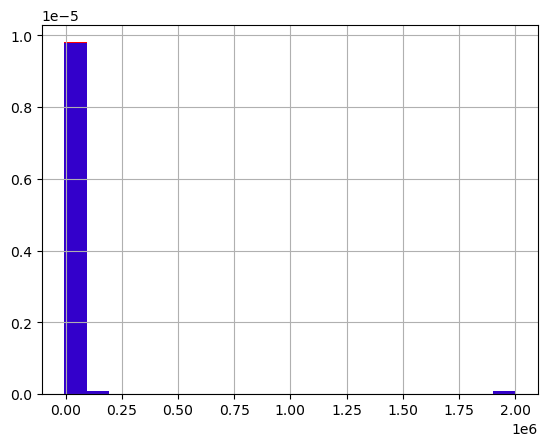

In [361]:
# now we will see via histogram how is the distribution of salary column before and after
fig = plt.figure()
ax = fig.add_subplot(111)

# Orginal data
df['Salary'].hist(bins = 20 , ax = ax, density = True, color = 'red')

# New data
new_df['Salary'].hist(bins = 20 , ax = ax, density = True, color = 'blue', alpha = 0.8)

# Now we will replace the missing value with mean or mode

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [363]:
df = pd.read_csv("/Users/napstarps/PYTHON/DataSet/synthetic_counter_dataset.csv",usecols=['Age','Salary','EducationLevel','City','Department','Purchased'])

In [364]:
df.head()

,Age,Salary,Department,EducationLevel,City,Purchased
0,36.0,59926.0,Operations,Masters,Chennai,0
1,34.0,38304.0,Finance,Bachelors,Kolkata,1
2,22.0,35230.0,Engineering,Masters,Mumbai,0
3,41.0,54157.0,Sales,Bachelors,NaN,0
4,30.0,44176.0,Sales,Bachelors,Hyderabad,1


In [365]:
df.isnull().sum()

Age               6
Salary            6
Department        6
EducationLevel    6
City              7
Purchased         0
dtype: int64

In [366]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = 'Purchased'),df['Purchased'],test_size=0.3,random_state = 42)

In [367]:
X_train.shape,X_test.shape

((89, 5), (39, 5))

In [368]:
X_train.isnull().mean() * 100

Age               4.494382
Salary            3.370787
Department        3.370787
EducationLevel    4.494382
City              5.617978
dtype: float64

In [369]:
mean_age = X_train['Age'].mean()
mean_salary = X_train['Salary'].mean()
mode_education_level = X_train['EducationLevel'].mode()[0]
mode_department = X_train["Department"].mode()[0]
mode_city = X_train['City'].mode()[0]

In [370]:
# Now we will create four new columns 
X_train['mean_age'] = X_train['Age'].fillna(mean_age)
X_train['mean_salary'] = X_train['Salary'].fillna(mean_salary)
X_train['mode_department'] = X_train['Department'].fillna(mode_department)
X_train['mode_education_level'] = X_train['EducationLevel'].fillna(mode_education_level[0])
X_train['mode_city'] = X_train['City'].fillna(mode_city[0])

In [371]:
X_train.sample(5)

,Age,Salary,Department,EducationLevel,City,mean_age,mean_salary,mode_department,mode_education_level,mode_city
25,26.0,54953.0,HR,Bachelors,Kolkata,26.0,54953.0,HR,Bachelors,Kolkata
73,39.0,33178.0,Engineering,Bachelors,Pune,39.0,33178.0,Engineering,Bachelors,Pune
17,29.0,54293.0,Operations,Masters,Chennai,29.0,54293.0,Operations,Masters,Chennai
99,30.0,41840.0,Operations,Masters,Delhi,30.0,41840.0,Operations,Masters,Delhi
85,27.0,59865.0,Engineering,Bachelors,Pune,27.0,59865.0,Engineering,Bachelors,Pune


In [372]:
# Now we will see the effect of variance in one column
#Varience reduce as values moves towards mean
print("Original Age variance: ",X_train['Age'].var())
print("New Age variance: ",X_train['mean_age'].var())

Original Age variance:  140.41540616246496
New Age variance:  134.0328877005347


<Axes: >

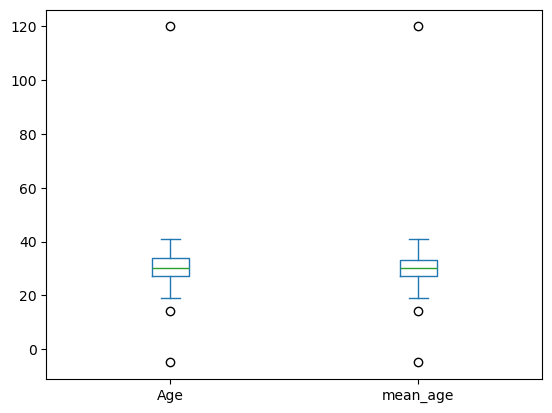

In [373]:
# lets apply box plot
X_train[['Age','mean_age']].plot(kind = 'box')

# Now we will apply Scikitlearn class ie. Simple Imputer to so the missing value imputation 

In [374]:
from sklearn.impute import SimpleImputer

In [375]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = 'Purchased'),df['Purchased'],test_size=0.3,random_state = 42)
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='most_frequent') #For categorical columns

In [376]:
imputer1. fit(X_train[['Age','Salary']])

SimpleImputer()

In [377]:
imputer2.fit(X_train[['EducationLevel','City','Department']])

SimpleImputer(strategy='most_frequent')

# We can also use column transformer to apply different imputation techniques on different columns


In [378]:
# We can also use column transformer to apply different imputation techniques on different columns
from sklearn.compose import ColumnTransformer

In [379]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age','Salary']),
    ('imputer2',imputer2,['EducationLevel','City', 'Department'])
],remainder='passthrough')

In [380]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [381]:
# Get the transformed feature names
feature_names = trf.get_feature_names_out()
X_train_df = pd.DataFrame(X_train, columns = feature_names)
X_train_df.isnull().sum()

imputer1__Age               0
imputer1__Salary            0
imputer2__EducationLevel    0
imputer2__City              0
imputer2__Department        0
dtype: int64

In [382]:
new_df.isnull().sum()

Age               0
Salary            0
Department        0
EducationLevel    0
City              0
dtype: int64

# Till now i have find the missing value and impute it using mode & mean & scikit learn library SimpleImputer and Column transfrormer which ever is suitable
The new_df don't contain any missing values

In [383]:
# Create a new DataFrame with all original columns and NaN replaced by mean/mode
df_filled = df_orginal.copy()


I have done this so that in df_filled i will have all orginal column from the dataset and i have use the mean, mode imputer to replace the nan value

In [384]:
df_filled['Age'] = df_filled['Age'].fillna(mean_age)
df_filled['Salary'] = df_filled['Salary'].fillna(mean_salary)
df_filled['EducationLevel'] = df_filled['EducationLevel'].fillna(mode_education_level)
df_filled['Department'] = df_filled["Department"].fillna(mode_department)
df_filled['City'] = df_filled['City'].fillna(mode_city)
df_filled.head()

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
0,56,36.0,59926.0,17,Operations,Masters,Female,Chennai,0,9
1,41,34.0,38304.0,16,Finance,Bachelors,Male,Kolkata,1,5
2,20,22.0,35230.0,4,Engineering,Masters,Male,Mumbai,0,9
3,32,41.0,54157.0,22,Sales,Bachelors,Male,Kolkata,0,4
4,99,30.0,44176.0,11,Sales,Bachelors,Female,Hyderabad,1,5


In [385]:

df_filled.isnull().sum()

ID                 0
Age                0
Salary             0
ExperienceYears    0
Department         0
EducationLevel     0
Gender             0
City               0
Purchased          0
Rating             0
dtype: int64

# Now df_filled contain the whole dataset without any null value 

# Now we will check if df_filled contains any duplicates, if yes we will remove them

In [386]:
# Check for duplicate rows in df_filled
duplicates = df_filled.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df_filled = df_filled.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")
df_filled.shape

Number of duplicate rows: 0
No duplicates found.


(128, 10)

# Now we will check outliers if there are any

In [387]:
df_filled

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
0,56,36.000000,59926.0,17,Operations,Masters,Female,Chennai,0,9
1,41,34.000000,38304.0,16,Finance,Bachelors,Male,Kolkata,1,5
2,20,22.000000,35230.0,4,Engineering,Masters,Male,Mumbai,0,9
3,32,41.000000,54157.0,22,Sales,Bachelors,Male,Kolkata,0,4
4,99,30.000000,44176.0,11,Sales,Bachelors,Female,Hyderabad,1,5
...,...,...,...,...,...,...,...,...,...,...
123,107,41.000000,50771.0,23,HR,HighSchool,Female,Kolkata,0,4
124,15,20.000000,38967.0,2,Engineering,HighSchool,Male,Bengaluru,1,10
125,93,26.000000,61448.0,6,Operations,HighSchool,Female,Pune,0,8
126,52,30.564706,40210.0,9,Engineering,Bachelors,Female,Bengaluru,0,7


/var/folders/3n/fypl5qcs3t59crmm3hfynflh0000gn/T/ipykernel_22242/1623094196.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filled["Age"])
/var/folders/3n/fypl5qcs3t59crmm3hfynflh0000gn/T/ipykernel_22242/1623094196.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filled["Salary"])
/

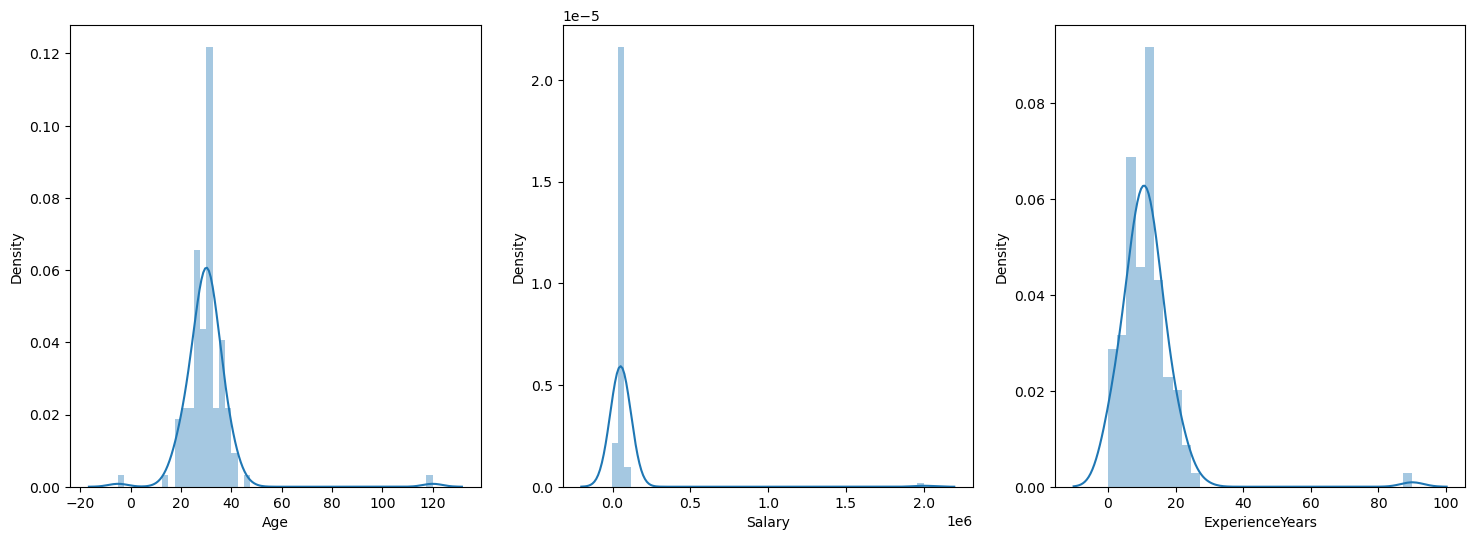

In [388]:
# We will visualize if there is any outlier in the numerical columns

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.distplot(df_filled["Age"])

plt.subplot(1,3,2)
sns.distplot(df_filled["Salary"])

plt.subplot(1,3,3)
sns.distplot(df_filled["ExperienceYears"])

plt.show()

In [389]:
# Now we will find the boundary value ie. the upper limit and ther lower limit of Z-Score method (mean +- 3*std)
print("Highest allowed value of Age", df_filled['Age'].mean() + 3 *df_filled['Age'].std())
print("Lowest allowed value of Age", df_filled['Age'].mean() - 3 *df_filled['Age'].std())

print("Highest allowed value of Salary", df_filled['Salary'].mean() + 3 *df_filled['Salary'].std())
print("Lowest allowed value of Salary", df_filled['Salary'].mean() - 3 *df_filled['Salary'].std())

print("Highest allowed value of ExperienceYears", df_filled['ExperienceYears'].mean() + 3 *df_filled['ExperienceYears'].std())
print("Lowest allowed value of ExperienceYears", df_filled['ExperienceYears'].mean() - 3 *df_filled['ExperienceYears'].std())

Highest allowed value of Age 60.77226453535882
Lowest allowed value of Age -0.5318233588882393
Highest allowed value of Salary 584768.3682675484
Lowest allowed value of Salary -451874.43331115297
Highest allowed value of ExperienceYears 38.150992647784804
Lowest allowed value of ExperienceYears -15.4791176477848


In [390]:
# This will list out the outliers in age column
df_filled[(df_filled['Age'] > 61.499) | (df_filled['Age'] < -1.302)] 

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
32,127,120.0,2000000.0,90,Engineering,PhD,Male,Mumbai,1,10
119,128,-5.0,-5000.0,0,Sales,HighSchool,Female,Delhi,0,1


In [391]:
# This will list out the outlier in the salary column
df_filled[(df_filled["Salary"] > 597175.15) | (df_filled["Salary"] < -464831.026)]

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
32,127,120.0,2000000.0,90,Engineering,PhD,Male,Mumbai,1,10


In [392]:
# This will list out the outlier in the ExperienceYears column
df_filled[(df_filled["ExperienceYears"] > 38.15) | (df_filled["ExperienceYears"] < -15.4)]

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
32,127,120.0,2000000.0,90,Engineering,PhD,Male,Mumbai,1,10


In [393]:
# We will make a dataset where there is no outlier by trimming method as there are less outlier or we can use clipping 
# In clipping we just replace the outlier with max value and min value accordingly
df_no_outlier = df_filled.copy()
df_no_outlier = df_filled[(df_filled["Age"] < 61.499) & (df_filled["Age"] > -1.302)]
df_no_outlier = df_filled[(df_filled["Salary"] < 597175.15) & (df_filled["Salary"] > -464831.026)]
df_no_outlier = df_filled[(df_filled["ExperienceYears"] < 38.15) & (df_filled["ExperienceYears"] > -15.4)]



In [394]:
df_no_outlier

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
0,56,36.000000,59926.0,17,Operations,Masters,Female,Chennai,0,9
1,41,34.000000,38304.0,16,Finance,Bachelors,Male,Kolkata,1,5
2,20,22.000000,35230.0,4,Engineering,Masters,Male,Mumbai,0,9
3,32,41.000000,54157.0,22,Sales,Bachelors,Male,Kolkata,0,4
4,99,30.000000,44176.0,11,Sales,Bachelors,Female,Hyderabad,1,5
...,...,...,...,...,...,...,...,...,...,...
123,107,41.000000,50771.0,23,HR,HighSchool,Female,Kolkata,0,4
124,15,20.000000,38967.0,2,Engineering,HighSchool,Male,Bengaluru,1,10
125,93,26.000000,61448.0,6,Operations,HighSchool,Female,Pune,0,8
126,52,30.564706,40210.0,9,Engineering,Bachelors,Female,Bengaluru,0,7


/var/folders/3n/fypl5qcs3t59crmm3hfynflh0000gn/T/ipykernel_22242/3629185499.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outlier["Age"])
/var/folders/3n/fypl5qcs3t59crmm3hfynflh0000gn/T/ipykernel_22242/3629185499.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outlier["Sal

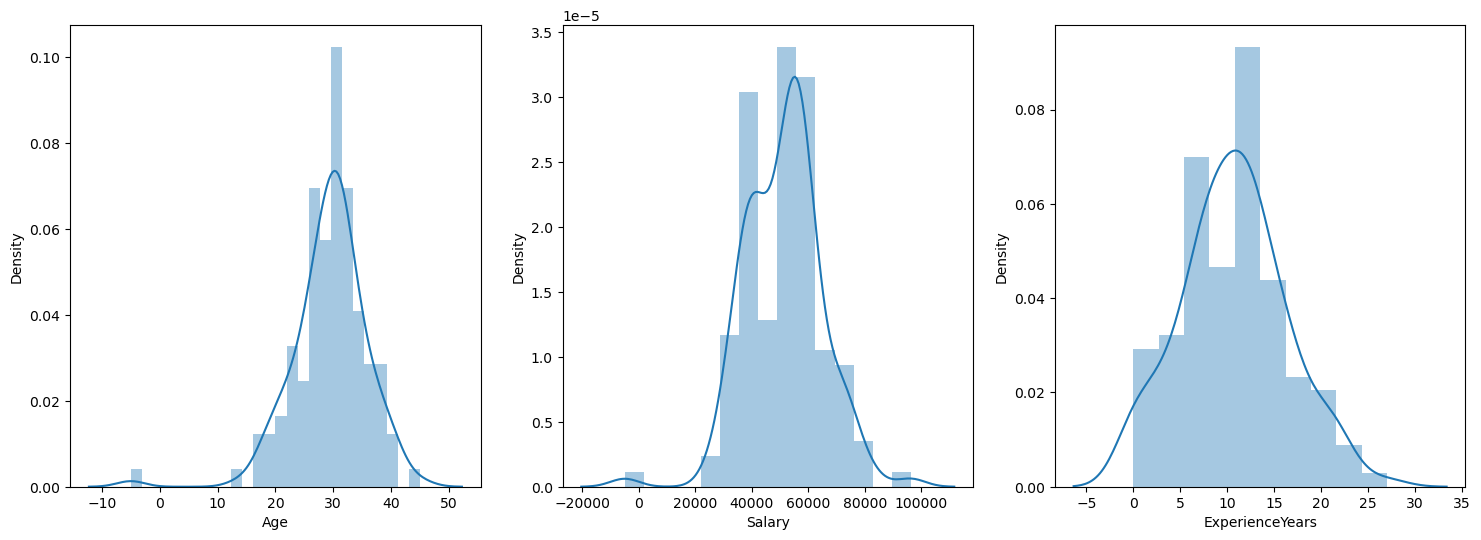

In [395]:
# We will visualize if there is any outlier in the numerical columns

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.distplot(df_no_outlier["Age"])

plt.subplot(1,3,2)
sns.distplot(df_no_outlier["Salary"])

plt.subplot(1,3,3)
sns.distplot(df_no_outlier["ExperienceYears"])

plt.show()

# Till here outliers are removed using Z Score

# Now i will use IQR
we use IQR when data is skewed

In [396]:
# min range = Q1 - 1.5 * IQR 
# max range = Q3 + 1.5 * IQR
# IQR = Q3(75%) - Q2(25%)

<Axes: ylabel='ExperienceYears'>

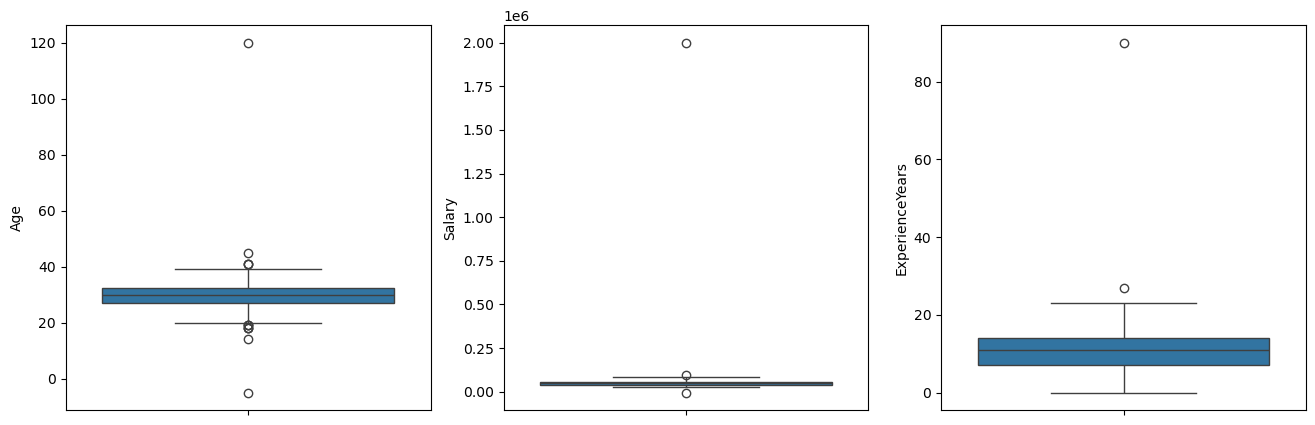

In [397]:
# We will use it in Age , Salary , ExperienceYears
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot(df_filled["Age"])

plt.subplot(1,3,2)
sns.boxplot(df_filled["Salary"])

plt.subplot(1,3,3)
sns.boxplot(df_filled["ExperienceYears"])

In [398]:
percentile25_age = df_filled["Age"].quantile(0.25)
percentile75_age =df_filled["Age"].quantile(0.75)

percentile25_salary = df_filled["Salary"].quantile(0.25)
percentile75_salary = df_filled["Salary"].quantile(0.75)

percentile25_expYears = df_filled["ExperienceYears"].quantile(0.25)
percentile75_expYears = df_filled["ExperienceYears"].quantile(0.75)

In [399]:
#IQR_age
IQR_age = percentile75_age - percentile25_age
IQR_salary = percentile75_salary - percentile25_salary
IQR_expYears = percentile75_expYears - percentile25_expYears  

In [400]:
upper_limit_age = percentile75_age + 1.5 * IQR_age
lower_limit_age = percentile25_age - 1.5 * IQR_age

upper_limit_salary = percentile75_salary + 1.5 * IQR_salary
lower_limit_salary = percentile25_salary - 1.5 * IQR_salary 

upper_limit_expYears = percentile75_expYears + 1.5 * IQR_expYears
lower_limit_expYears = percentile25_expYears - 1.5 * IQR_expYears   

In [401]:
print("Upper limit of Age: ", upper_limit_age)
print("Lower limit of Age: ", lower_limit_age)

print("Upper limit of Salary: ", upper_limit_salary)
print("Lower limit of Salary: ", lower_limit_salary)

print("Upper limit of ExperienceYears: ", upper_limit_expYears) 
print("Lower limit of ExperienceYears: ", lower_limit_expYears)

Upper limit of Age:  40.125
Lower limit of Age:  19.125
Upper limit of Salary:  85410.875
Lower limit of Salary:  14189.875
Upper limit of ExperienceYears:  24.5
Lower limit of ExperienceYears:  -3.5


In [402]:
# find outliers in age column
df_filled[(df_filled["Age"]> upper_limit_age) | (df_filled["Age"] < lower_limit_age)]

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
3,32,41.0,5.415700e+04,22,Sales,Bachelors,Male,Kolkata,0,4
15,114,45.0,4.218100e+04,27,Engineering,Bachelors,Female,Mumbai,1,7
32,127,120.0,2.000000e+06,90,Engineering,PhD,Male,Mumbai,1,10
59,50,19.0,4.095500e+04,1,Engineering,Masters,Male,Kolkata,0,8
71,14,19.0,5.568300e+04,0,Engineering,Bachelors,Female,Pune,0,4
80,111,18.0,4.123600e+04,0,Sales,PhD,Female,Hyderabad,1,5
88,125,41.0,5.415700e+04,22,Sales,Bachelors,Male,Kolkata,0,4
89,80,18.0,3.628400e+04,0,Marketing,Bachelors,Male,Pune,0,9
100,121,19.0,5.568300e+04,0,Engineering,Bachelors,Female,Pune,0,4
104,38,18.0,7.203664e+04,0,Engineering,Bachelors,Female,Pune,0,5


In [403]:
# find outliers in salary column
df_filled[(df_filled["Salary"]> upper_limit_salary) | (df_filled["Salary"] < lower_limit_salary)]

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
32,127,120.0,2000000.0,90,Engineering,PhD,Male,Mumbai,1,10
36,90,33.0,96233.0,15,Sales,Masters,Other,Delhi,1,8
119,128,-5.0,-5000.0,0,Sales,HighSchool,Female,Delhi,0,1


In [404]:
# Find outliers in ExperienceYears column
df_filled[(df_filled["ExperienceYears"]> upper_limit_expYears) | (df_filled["ExperienceYears"] < lower_limit_expYears)]

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
15,114,45.0,42181.0,27,Engineering,Bachelors,Female,Mumbai,1,7
32,127,120.0,2000000.0,90,Engineering,PhD,Male,Mumbai,1,10


# Now we will trim

In [405]:
df_no_outlier = df_no_outlier[(df_no_outlier["Age"]< upper_limit_age) & (df_no_outlier["Age"] > lower_limit_age)]
df_no_outlier = df_no_outlier[(df_no_outlier["Salary"]< upper_limit_salary) & (df_no_outlier["Salary"] > lower_limit_salary)]
df_no_outlier = df_no_outlier[(df_no_outlier["ExperienceYears"]< upper_limit_expYears) & (df_no_outlier["ExperienceYears"] > lower_limit_expYears)]

Now we will see how the column looks likes after removing the outliers

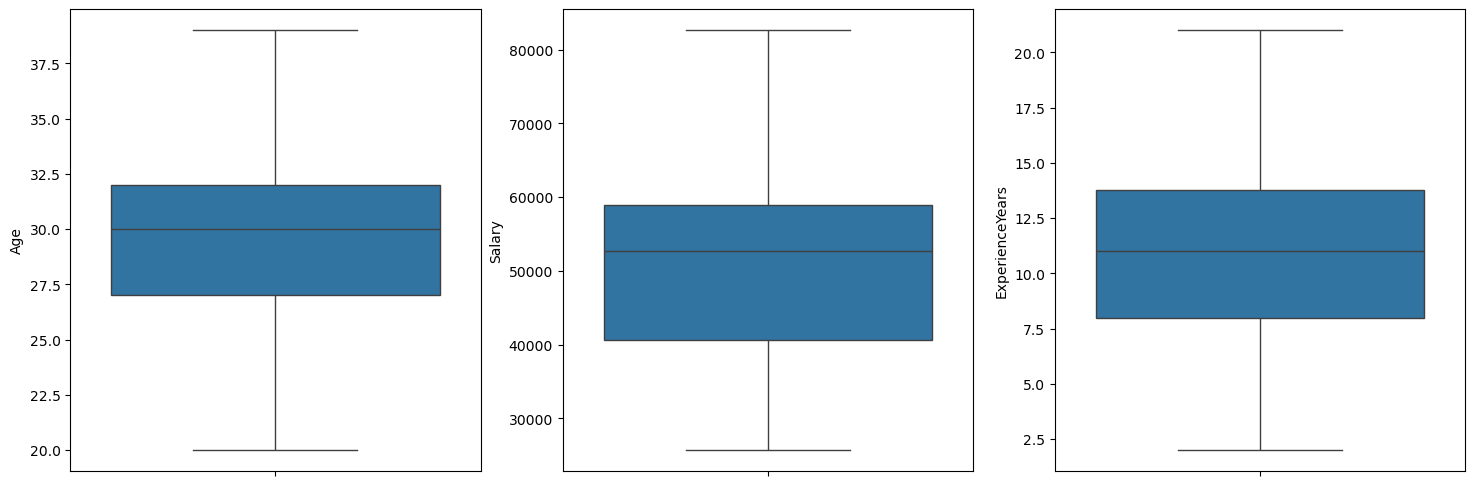

In [406]:
# Now we will see how the column looks likes after removing the outliers

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(df_no_outlier["Age"])

plt.subplot(1,3,2)
sns.boxplot(df_no_outlier["Salary"])
 
plt.subplot(1,3,3)
sns.boxplot(df_no_outlier["ExperienceYears"])

plt.show()

# NOW WE WILL PERFORM EDA ON THE COLUMNS 

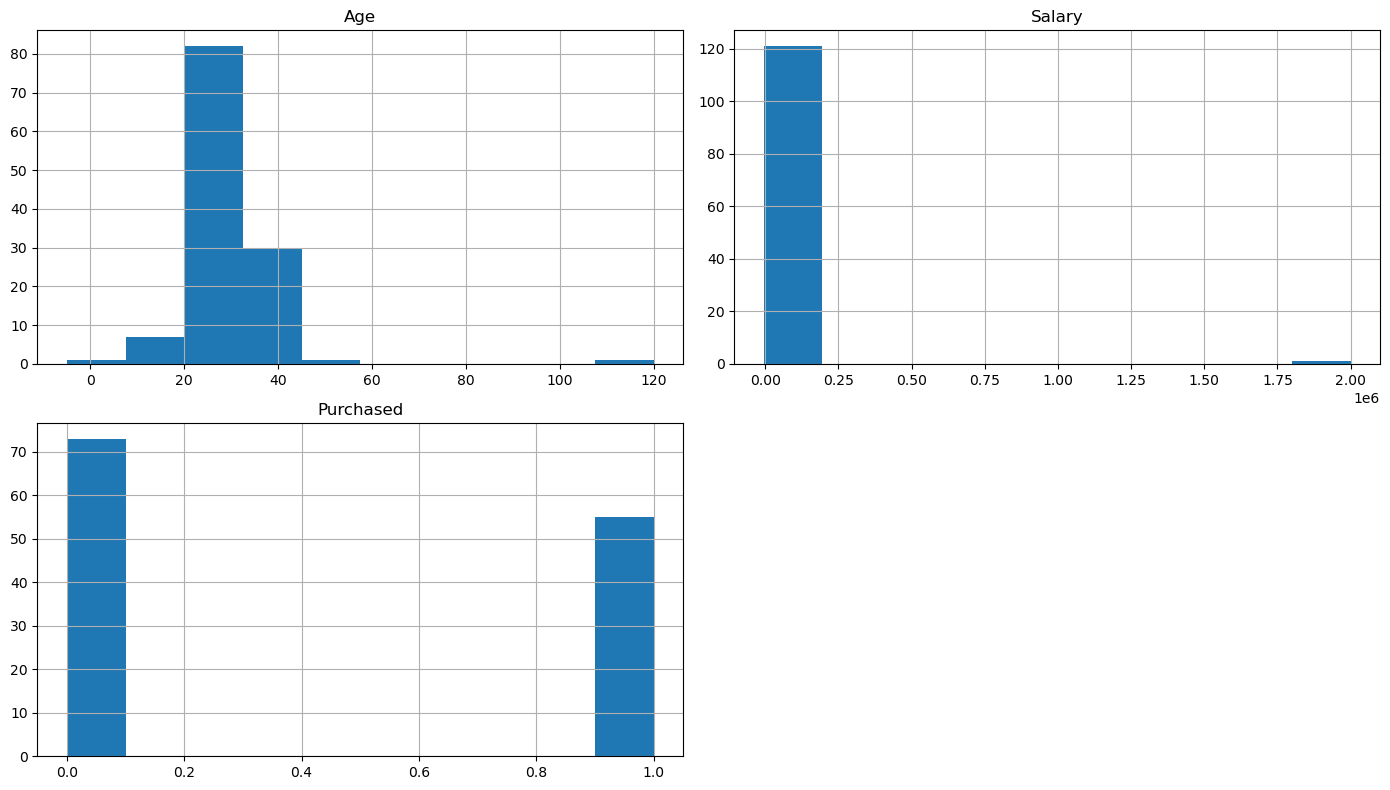

In [407]:
# Histograms for numerical columns
df.hist(figsize=(14,8))
plt.tight_layout()
plt.show()

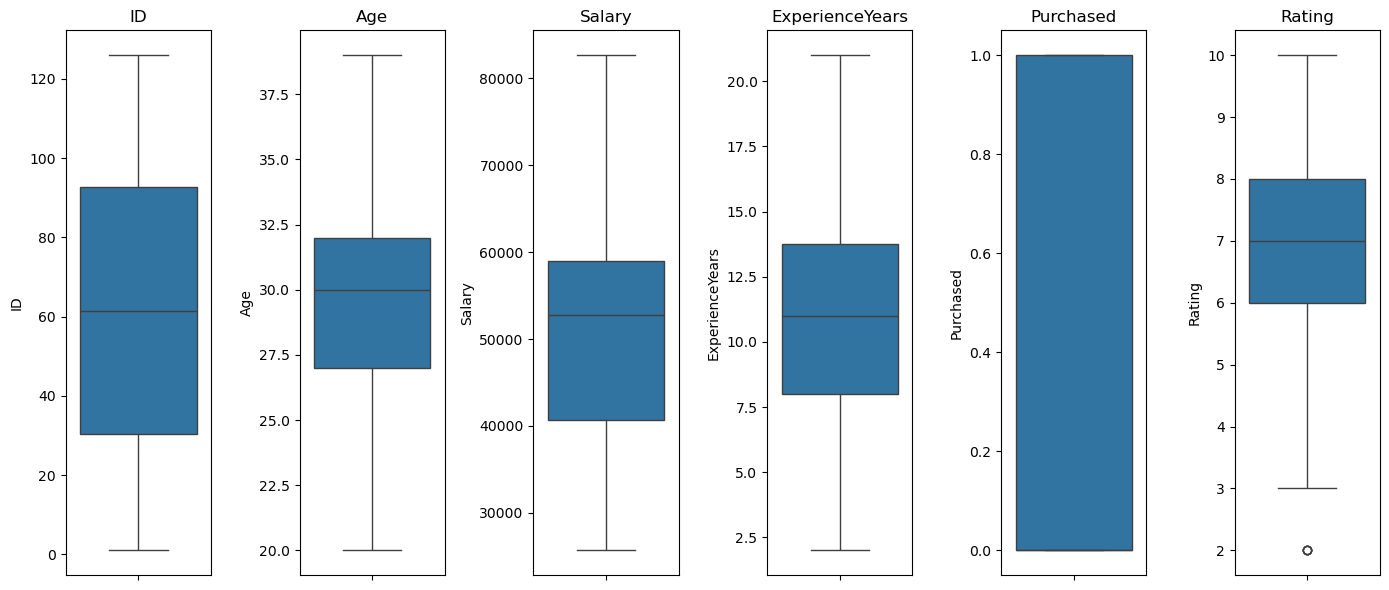

In [408]:
# Boxplots for numerical columns
plt.figure(figsize=(14,6))
for i, col in enumerate(df_no_outlier.select_dtypes(include='number').columns):
    plt.subplot(1, len(df_no_outlier.select_dtypes(include='number').columns), i+1)
    sns.boxplot(y=df_no_outlier[col])
    plt.title(col)
plt.tight_layout()
plt.show()

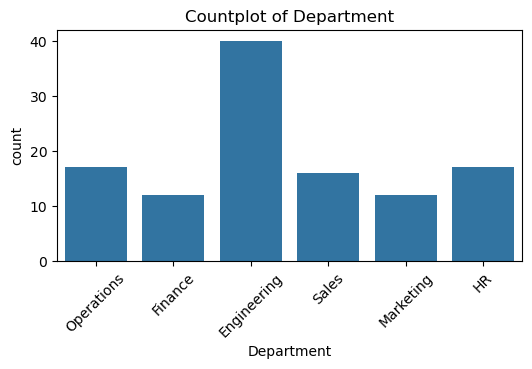

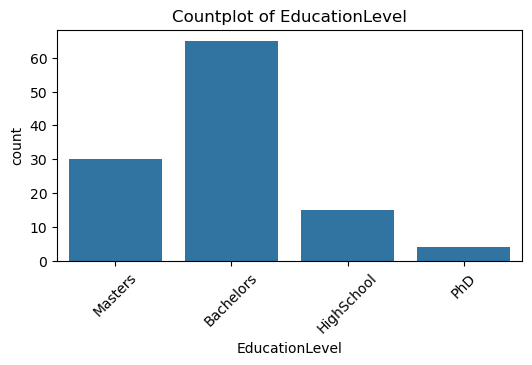

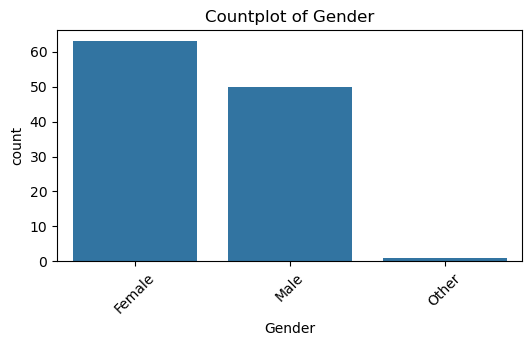

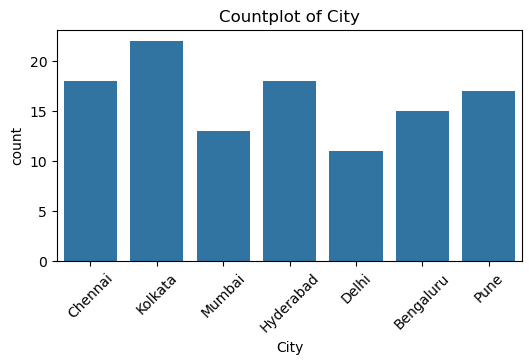

In [409]:
# Countplots for categorical columns
categorical_cols = df_no_outlier.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df_no_outlier)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

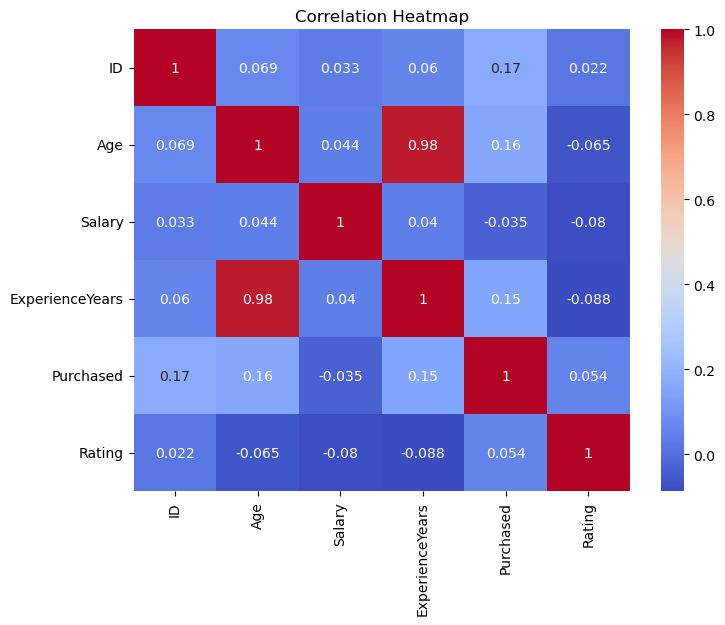

In [410]:
# Correlation heatmap for numeric columns only
plt.figure(figsize=(8,6))
numeric_cols = df_no_outlier.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

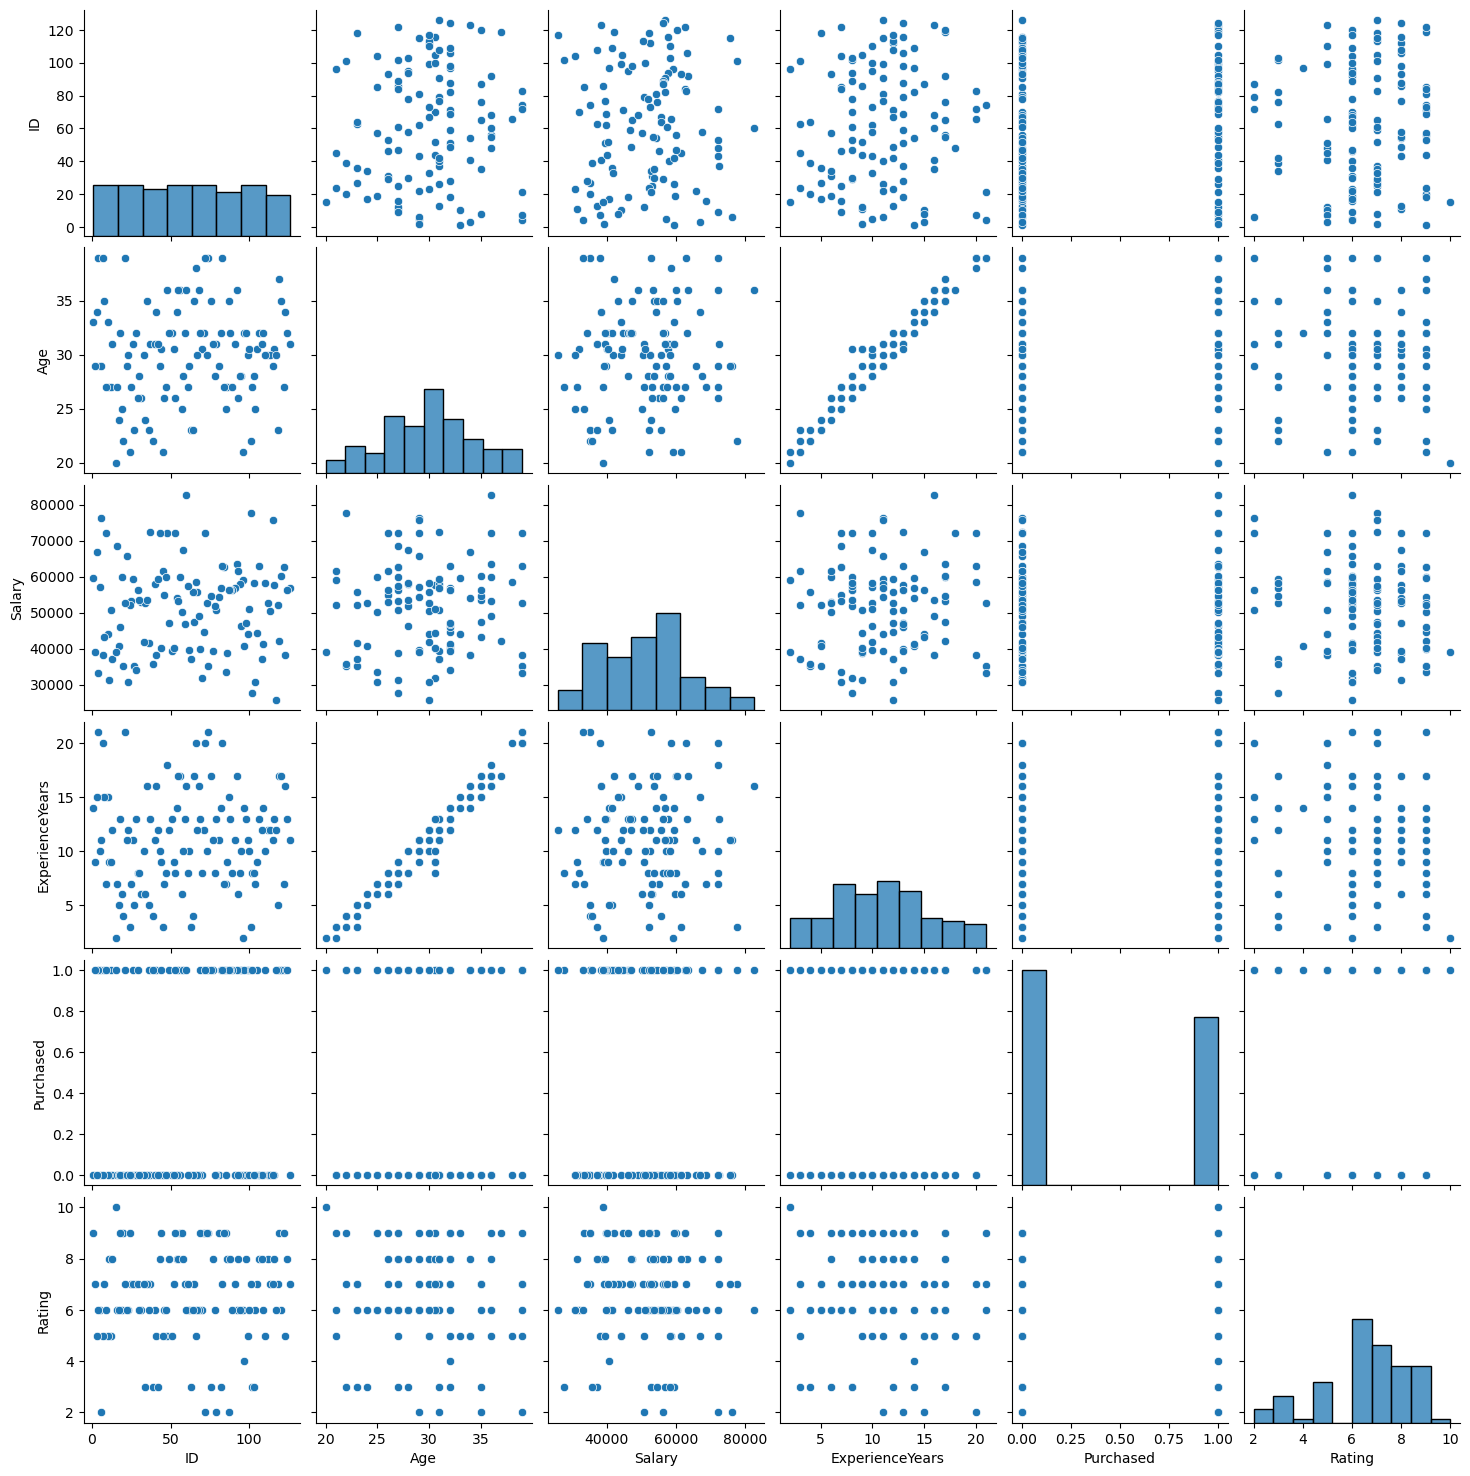

In [411]:
# Pairplot for numerical columns
sns.pairplot(df_no_outlier)
#plt.suptitle("Pairplot of Numerical Columns", y=.02)
plt.show()

Now we completed our EDA 

#  Now we can convert the categorical column to numerical column

1st we see how amny categorical column we have

In [412]:
df_no_outlier

,ID,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased,Rating
0,56,36.000000,59926.000000,17,Operations,Masters,Female,Chennai,0,9
1,41,34.000000,38304.000000,16,Finance,Bachelors,Male,Kolkata,1,5
2,20,22.000000,35230.000000,4,Engineering,Masters,Male,Mumbai,0,9
4,99,30.000000,44176.000000,11,Sales,Bachelors,Female,Hyderabad,1,5
5,57,25.000000,50156.000000,6,Engineering,Bachelors,Male,Chennai,1,9
...,...,...,...,...,...,...,...,...,...,...
122,72,39.000000,72036.639535,20,Marketing,Masters,Male,Bengaluru,1,2
124,15,20.000000,38967.000000,2,Engineering,HighSchool,Male,Bengaluru,1,10
125,93,26.000000,61448.000000,6,Operations,HighSchool,Female,Pune,0,8
126,52,30.564706,40210.000000,9,Engineering,Bachelors,Female,Bengaluru,0,7


From we will take only the necessary column 

In [413]:
df_impute = df_no_outlier.drop(columns=['ID','Rating'])

In [414]:
df_impute

,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased
0,36.000000,59926.000000,17,Operations,Masters,Female,Chennai,0
1,34.000000,38304.000000,16,Finance,Bachelors,Male,Kolkata,1
2,22.000000,35230.000000,4,Engineering,Masters,Male,Mumbai,0
4,30.000000,44176.000000,11,Sales,Bachelors,Female,Hyderabad,1
5,25.000000,50156.000000,6,Engineering,Bachelors,Male,Chennai,1
...,...,...,...,...,...,...,...,...
122,39.000000,72036.639535,20,Marketing,Masters,Male,Bengaluru,1
124,20.000000,38967.000000,2,Engineering,HighSchool,Male,Bengaluru,1
125,26.000000,61448.000000,6,Operations,HighSchool,Female,Pune,0
126,30.564706,40210.000000,9,Engineering,Bachelors,Female,Bengaluru,0


# We can use OHE , Ordinal in order column , label in output column for converting categorical to numerical
In our case we will use df_impute

In [415]:
from sklearn.preprocessing import OneHotEncoder

In [416]:
df_impute['Department'].value_counts()

Department
Engineering    40
Operations     17
HR             17
Sales          16
Finance        12
Marketing      12
Name: count, dtype: int64

In [417]:
df_impute['EducationLevel'].value_counts()

EducationLevel
Bachelors     65
Masters       30
HighSchool    15
PhD            4
Name: count, dtype: int64

In [418]:
df_impute['City'].value_counts()

City
Kolkata      22
Chennai      18
Hyderabad    18
Pune         17
Bengaluru    15
Mumbai       13
Delhi        11
Name: count, dtype: int64

# OHE using pands
dtype = int ensures that the new columns are of integer type (ie. 0/1)

In [419]:
# We use the pd.get_dummies() function to perform One-Hot Encoding
df_OHE = pd.get_dummies(df_impute,columns = ['Department', 'EducationLevel', 'City'],drop_first=True,dtype=int)

In [420]:
df_OHE

,Age,Salary,ExperienceYears,Gender,Purchased,Department_Finance,Department_HR,Department_Marketing,Department_Operations,Department_Sales,EducationLevel_HighSchool,EducationLevel_Masters,EducationLevel_PhD,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune
0,36.000000,59926.000000,17,Female,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,34.000000,38304.000000,16,Male,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,22.000000,35230.000000,4,Male,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,30.000000,44176.000000,11,Female,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
5,25.000000,50156.000000,6,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,39.000000,72036.639535,20,Male,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
124,20.000000,38967.000000,2,Male,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
125,26.000000,61448.000000,6,Female,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
126,30.564706,40210.000000,9,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 # OHE using sklearn

In [421]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [422]:
X_train,X_test,y_train,y_test = train_test_split(df_impute.drop(columns=['Age','Salary','Purchased']),df_impute['Purchased'],test_size = 0.2,random_state = 42)
ohe = OneHotEncoder(drop='first', dtype=int)


In [423]:
X_train_ohe = ohe.fit_transform(X_train)

We convert X_train_ohe into DataFrame because in later stages we have to concatinate the transformed columns

In [424]:
# Convert the sparse matrix to a dense array before creating the DataFrame 
X_train_dataframe = pd.DataFrame(X_train_ohe.toarray(), columns=ohe.get_feature_names_out()) # Without using to_array() we cannot convert it into dataframe
X_train_dataframe.head()

,ExperienceYears_3,ExperienceYears_4,ExperienceYears_5,ExperienceYears_6,ExperienceYears_7,ExperienceYears_8,ExperienceYears_9,ExperienceYears_10,ExperienceYears_11,ExperienceYears_12,...,EducationLevel_Masters,EducationLevel_PhD,Gender_Male,Gender_Other,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [425]:
X_train_ohe.toarray()

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [426]:
X_test_ohe = ohe.fit_transform(X_test)

We convert X_test_ohe into DataFrame because in later stages we have to concatinate the transformed columns

In [427]:
# Convert the sparse matrix to a dense array before creating the DataFrame
X_test_dataframe = pd.DataFrame(X_test_ohe.toarray(), columns=ohe.get_feature_names_out()) # Without using to_array() we cannot convert it into dataframe
X_test_dataframe.head()

,ExperienceYears_4,ExperienceYears_6,ExperienceYears_8,ExperienceYears_9,ExperienceYears_10,ExperienceYears_11,ExperienceYears_13,ExperienceYears_16,ExperienceYears_17,ExperienceYears_18,...,Department_Sales,EducationLevel_HighSchool,EducationLevel_Masters,Gender_Male,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [428]:
X_test_ohe.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

# Now we will use Ordinal Encoding in the column whose values have a order like the EducationLevel Column

In [429]:
from sklearn.preprocessing import OrdinalEncoder

In [430]:
df_impute['EducationLevel'].value_counts()

EducationLevel
Bachelors     65
Masters       30
HighSchool    15
PhD            4
Name: count, dtype: int64

 Parameter passed in OrdinalEncoder is categories which take a list of list of oder from low to high

In [431]:
oe = OrdinalEncoder(categories=[['HighSchool','Bachelors','Masters','PhD']]) 

In [432]:
# we only take the EducationLevel column for Ordinal Encoding
# This is because it has an order in the values
# Now we will use Ordinal Encoding in the column whose values have a order like the Education
X_train,X_test,y_train,y_test = train_test_split(df_impute.drop(columns=['Age','Salary','Department','ExperienceYears','Gender','Purchased','City']),df_impute['Purchased'],test_size=0.2,random_state=42)

In [433]:
X_train_oe = oe.fit_transform(X_train)
X_test_oe = oe.fit_transform(X_test)

# Now i will perform Label Encoder 
it is usuallly performed in the output category column where the values have a order 
But here we will perform label encoder in the Gender column for trial

In [434]:
from sklearn.preprocessing import LabelEncoder

In [435]:
X_train,X_test,y_train,y_test = train_test_split(df_impute.drop(columns=['Age','Salary','Department','ExperienceYears','EducationLevel','Purchased','City']),df_impute['Purchased'],test_size=0.2,random_state=42)

In [436]:
le = LabelEncoder()

In [437]:
X_train_le = le.fit_transform(X_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [438]:
X_train_le

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0])

In [439]:
X_train

,Gender
34,Female
73,Male
125,Female
121,Female
24,Female
...,...
118,Female
16,Female
102,Female
55,Male


In [440]:
df_impute

,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased
0,36.000000,59926.000000,17,Operations,Masters,Female,Chennai,0
1,34.000000,38304.000000,16,Finance,Bachelors,Male,Kolkata,1
2,22.000000,35230.000000,4,Engineering,Masters,Male,Mumbai,0
4,30.000000,44176.000000,11,Sales,Bachelors,Female,Hyderabad,1
5,25.000000,50156.000000,6,Engineering,Bachelors,Male,Chennai,1
...,...,...,...,...,...,...,...,...
122,39.000000,72036.639535,20,Marketing,Masters,Male,Bengaluru,1
124,20.000000,38967.000000,2,Engineering,HighSchool,Male,Bengaluru,1
125,26.000000,61448.000000,6,Operations,HighSchool,Female,Pune,0
126,30.564706,40210.000000,9,Engineering,Bachelors,Female,Bengaluru,0


Now we will pick only the orginal numerical columns

In [441]:
X_train,X_test,y_train,y_test = train_test_split(df_impute.iloc[:,:4],df_impute.iloc[:,-1],test_size = .2,random_state=42)

# Now lets join all the columns - the orginal numerical , the transformed column after ohe . I will not select the column transformed my Ordinal and Label because in OHE i have transformed all the categorical column

In [452]:
X_train_transformed = np.concatenate((X_train,X_train_dataframe),axis=1)
X_test_transformed =np.concatenate((X_test,X_test_dataframe),axis=1)

In [456]:
X_train_transfromed_dataframe = pd.DataFrame(X_train_transformed,columns =X_train_dataframe.columns.tolist() + X_train.columns.tolist())
X_train_transfromed_dataframe.head()

,ExperienceYears_3,ExperienceYears_4,ExperienceYears_5,ExperienceYears_6,ExperienceYears_7,ExperienceYears_8,ExperienceYears_9,ExperienceYears_10,ExperienceYears_11,ExperienceYears_12,...,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,Age,Salary,ExperienceYears,Department
0,36.0,49126.0,16,Engineering,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,39.0,33178.0,21,Engineering,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,26.0,61448.0,6,Operations,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,27.0,57508.0,8,Engineering,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,32.0,63067.0,13,HR,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [455]:
X_test_transfromed_dataframe = pd.DataFrame(X_test_transformed,columns =X_test_dataframe.columns.tolist() + X_test.columns.tolist())
X_test_transfromed_dataframe.head()

,ExperienceYears_4,ExperienceYears_6,ExperienceYears_8,ExperienceYears_9,ExperienceYears_10,ExperienceYears_11,ExperienceYears_13,ExperienceYears_16,ExperienceYears_17,ExperienceYears_18,...,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,Age,Salary,ExperienceYears,Department
0,29.0,39714.0,10,Finance,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,0
1,25.0,50156.0,6,Engineering,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,23.0,37149.0,3,HR,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22.0,35704.0,4,Finance,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,32.0,34155.0,13,Engineering,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Easy way
# If we want to apply different transformation in different columns we use Column Transformer
In our case we will use the df_impute
 

In [458]:
df_impute

,Age,Salary,ExperienceYears,Department,EducationLevel,Gender,City,Purchased
0,36.000000,59926.000000,17,Operations,Masters,Female,Chennai,0
1,34.000000,38304.000000,16,Finance,Bachelors,Male,Kolkata,1
2,22.000000,35230.000000,4,Engineering,Masters,Male,Mumbai,0
4,30.000000,44176.000000,11,Sales,Bachelors,Female,Hyderabad,1
5,25.000000,50156.000000,6,Engineering,Bachelors,Male,Chennai,1
...,...,...,...,...,...,...,...,...
122,39.000000,72036.639535,20,Marketing,Masters,Male,Bengaluru,1
124,20.000000,38967.000000,2,Engineering,HighSchool,Male,Bengaluru,1
125,26.000000,61448.000000,6,Operations,HighSchool,Female,Pune,0
126,30.564706,40210.000000,9,Engineering,Bachelors,Female,Bengaluru,0


In [460]:
from sklearn.compose import ColumnTransformer

In [475]:

transformer = ColumnTransformer(transformers=[
    #('trf1', SimpleImputer(), ['City']),
    ('trf2', OrdinalEncoder(categories=[['HighSchool', 'Bachelors', 'Masters', 'PhD']]), ['EducationLevel']),
    ('trf3', OneHotEncoder(sparse_output=False,drop='first', dtype=int), ['Department','Gender', 'City'])
], remainder='passthrough')

# Now we have to fit_transform

In [491]:
X_train,X_test,y_train,y_test = train_test_split(df_impute.drop(columns= ['Purchased']),df_impute['Purchased'],test_size=0.2,random_state=42)

In [492]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

Till now we have X_train & X_test which have transformed values from categorical to numerical

# Now we will scale the numerical column by using z-score(standarization) & min-max scaling(normalization)
Lets perform it in X_train & X_test and we have to perform it in the numerical column 

# For z_score we will use StandardScaler function

In [493]:
from sklearn.preprocessing import StandardScaler

Z_score = StandardScaler()
X_train_scaled = Z_score.fit_transform(X_train)

# We don't use .fit_transform in X_test because this ensures that the test set remains unseen and simulates real-world predictions on n

In [494]:
X_test_scaled = Z_score.transform(X_test)

In [489]:
X_train

array([[2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.60000000e+01, 4.91260000e+04, 1.60000000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.90000000e+01, 3.31780000e+04, 2.10000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.60000000e+01, 6.14480000e+04, 6.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.30000000e+01, 5.57900000e+04, 4.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.90000000e+01, 7.62850000e+04, 1.10000000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.05647059e+01, 5.09820000e+04, 1.00000000e+01]])

In [506]:

X_train_scaled = pd.DataFrame(X_train)
X_test_scaled = pd.DataFrame(X_test)

In [504]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.000000,49126.0,16.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.000000,33178.0,21.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.000000,61448.0,6.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.000000,57508.0,8.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,32.000000,63067.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.000000,62997.0,20.0
87,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.000000,72389.0,13.0
88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.000000,55790.0,4.0
89,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.000000,76285.0,11.0


# Now we will use min-max-scaling

In [496]:
from sklearn.preprocessing import MinMaxScaler


In [498]:
min_max = MinMaxScaler()

# Here we use MIN_MAX_Scaler on the X_train and X_test and named the transformed array as X_train_min_max_scaled & X_test_min_max_scaled

In [499]:
X_train_min_max_scaled = min_max.fit_transform(X_train)

In [502]:
X_test_min_max_scaled = min_max.transform(X_test)

In [507]:
X_train_min_max_scaled

array([[0.66666667, 0.        , 0.        , ..., 0.84210526, 0.44986367,
        0.73684211],
       [0.33333333, 0.        , 0.        , ..., 1.        , 0.14363071,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.31578947, 0.68647029,
        0.21052632],
       ...,
       [0.33333333, 0.        , 0.        , ..., 0.15789474, 0.57782557,
        0.10526316],
       [0.33333333, 0.        , 0.        , ..., 0.47368421, 0.97136987,
        0.47368421],
       [0.33333333, 0.        , 0.        , ..., 0.55603715, 0.48550252,
        0.42105263]])

In [508]:
X_test_min_max_scaled

array([[0.66666667, 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.47368421,
        0.26913476, 0.42105263],
       [0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.26315789,
        0.46964169, 0.21052632],
       [0.33333333, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.15789474,
        0.21988172, 0.05263158],
       [0.33333333, 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.10526316,
        0.19213487, 0.10526316],
       [0.33333333, 0.        , 0.        , 0.      

# Finally we can use the data for training ML algorithm